In [1]:
"""Creates images of figures from each county showing death and injury trends. Calculates slope to show year on year trend."""
import numpy as np
import sys
import os



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

In [3]:
# Build and format data frames from csv results of GIS analysis.

countydeath_df = pd.read_csv(r'C:\Users\140318\Desktop\Python\Python3x\DWI\DWI-Insights\CSVresults\CountyDeaths.csv')
countydeath_df = countydeath_df.rename({0: 2010, 1:2011, 2:2012, 3:2013, 4:2014, 5:2015, 6:2016})
countyinjury_df = pd.read_csv(r'C:\Users\140318\Desktop\Python\Python3x\DWI\DWI-Insights\CSVresults\CountyInjuries.csv')
countyinjury_df = countyinjury_df.rename({0: 2010, 1:2011, 2:2012, 3:2013, 4:2014, 5:2015, 6:2016})
img_dir = '{0}\\StatsImg'.format(os.getcwd())

countydeath_df = countydeath_df.drop('Unnamed: 0', axis=1)
countyinjury_df = countyinjury_df.drop('Unnamed: 0', axis=1)
counties = list(countydeath_df.columns)
years = list(countydeath_df.index)

In [4]:
def plot_county(county, death_df, injury_df):
    """Plots county injury and death rates for each year as a figure. Calculates slope to use as regression"""
    plt.figure()
    plt.style.use('seaborn-darkgrid') 
    f, axes = plt.subplots(2, 1)
    plt.suptitle("{0} County Alcohol Involved Incidents Per 1000 People".format(county))
    
    # Injury sub plot
    c= injury_df[county]
    Y = np.array(list(c.index))
    P = np.array(list(c.values))
    f2 = interp1d(Y, P, kind='cubic')
    xnew = np.linspace(min(Y), max(Y), 100)
    axes[0].plot(Y,P,'H',xnew, f2(xnew), '--')
    fit = np.polyfit(c.index, c.values, 1)
    fit_fn = np.poly1d(fit)
    # axes[0].plot(c.index, c.values, 'o', c.index, fit_fn(c.index), '--k')
    axes[0].set_ylabel('Injury Rate')
    
    # Death sub plot
    a = death_df[county]
    Y = np.array(list(a.index))
    P = np.array(list(a.values))
    f2 = interp1d(Y, P, kind='cubic')
    xnew = np.linspace(min(Y), max(Y), 100)
    axes[1].plot(Y,P,'H',xnew, f2(xnew), '--')
    fit = np.polyfit(a.index, a.values, 1)
    fit_fn = np.poly1d(fit)
    # axes[1].plot(a.index, a.values, 'o', a.index, fit_fn(a.index), '--k')
    axes[1].set_ylabel('Death Rate')
    plt.savefig('{0}\\{1}.jpg'.format(img_dir, county), dpi=100)
    
    plt.show()

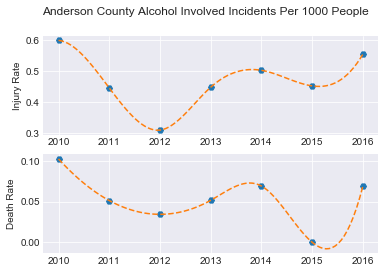

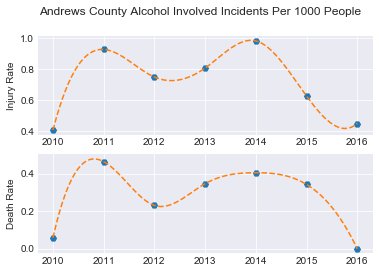

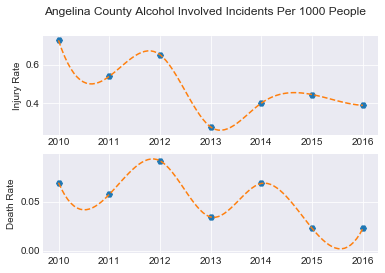

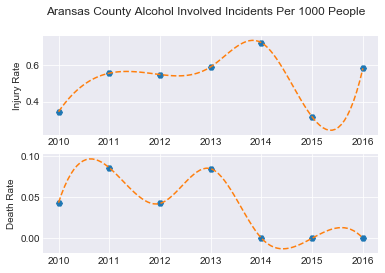

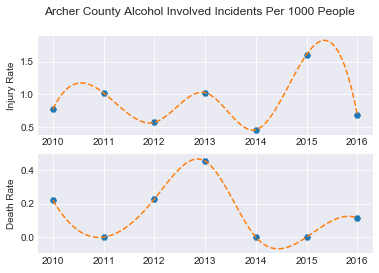

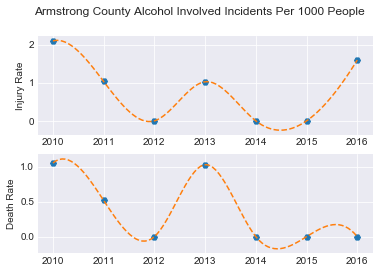

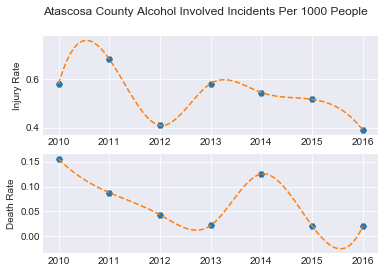

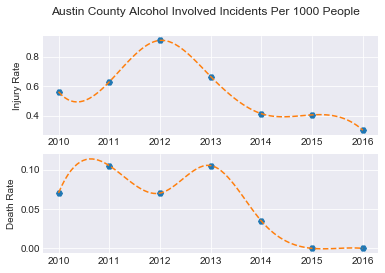

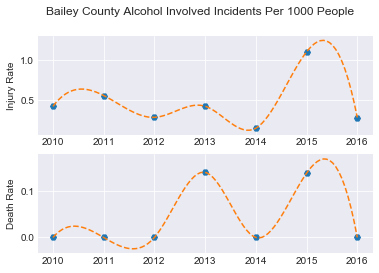

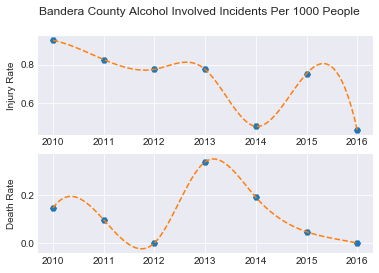

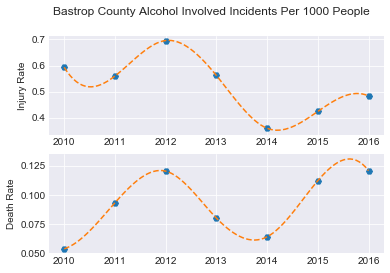

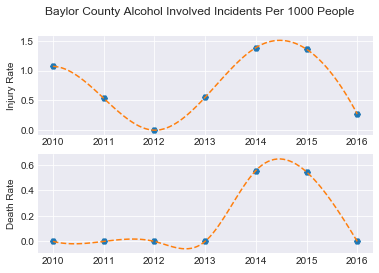

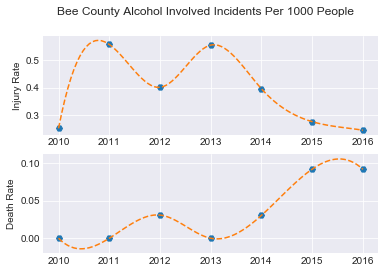

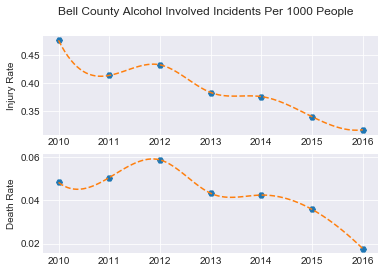

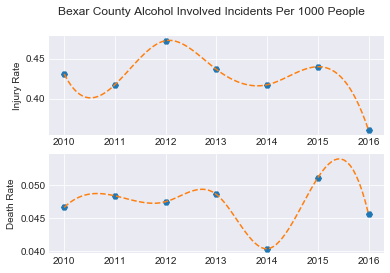

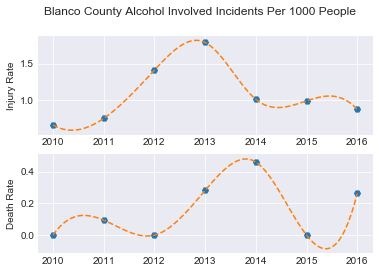

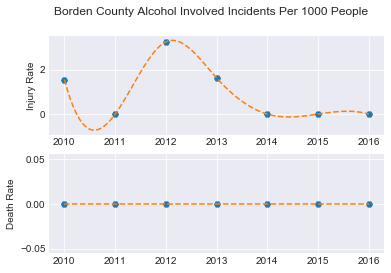

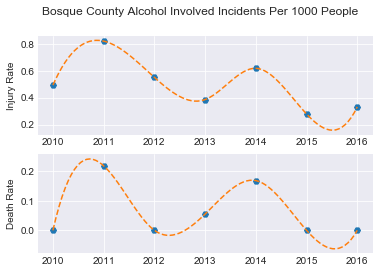

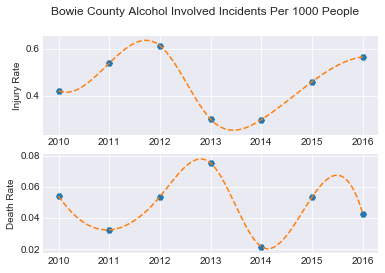

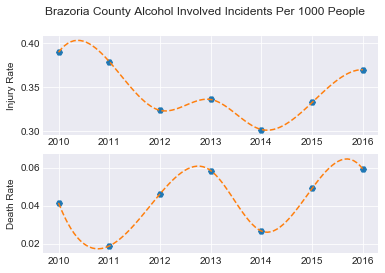

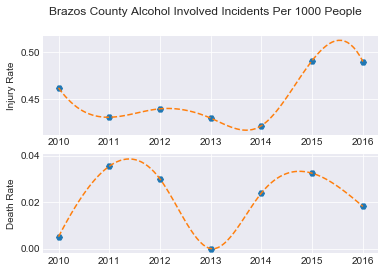

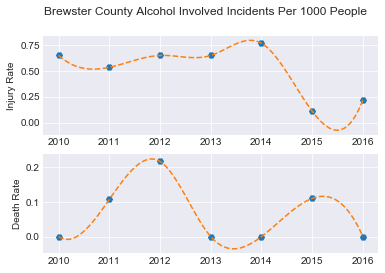

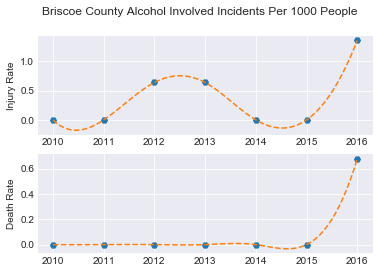

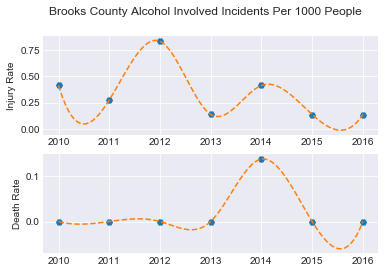

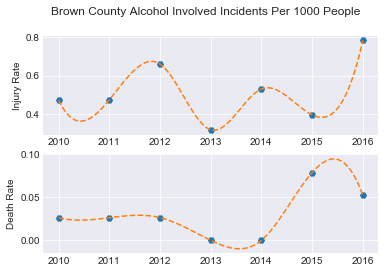

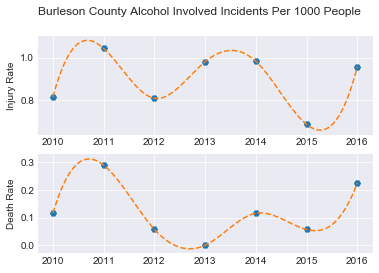

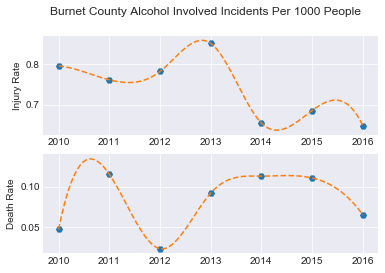

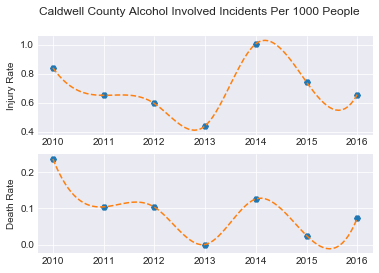

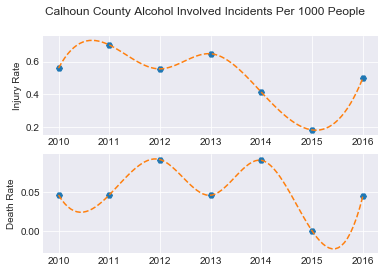

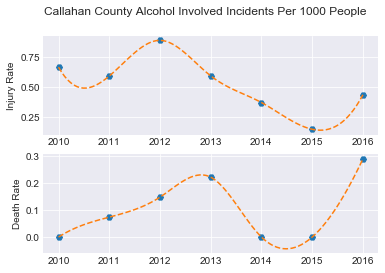

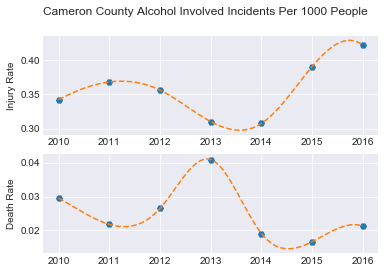

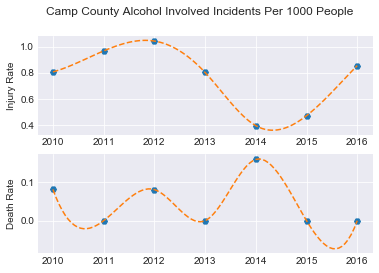

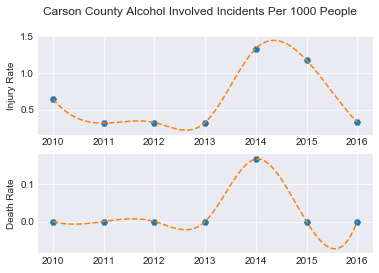

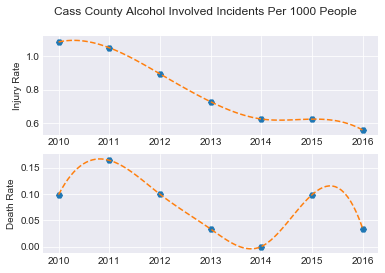

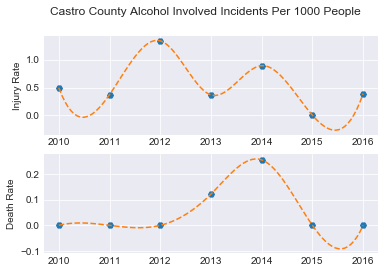

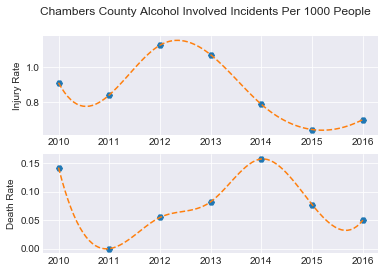

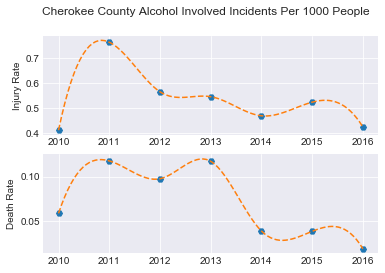

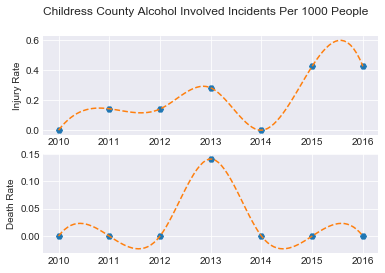

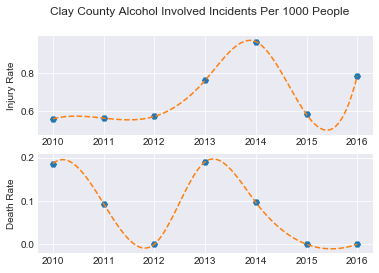

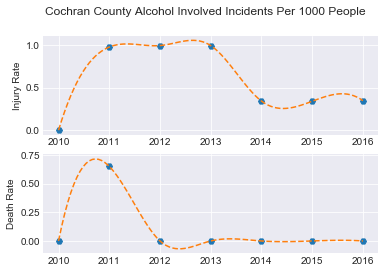

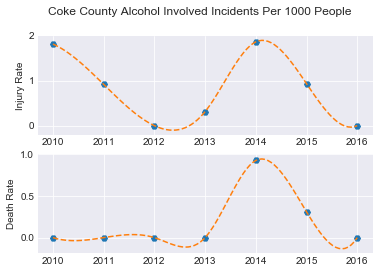

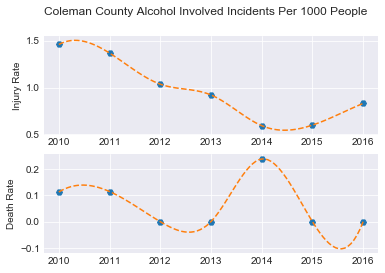

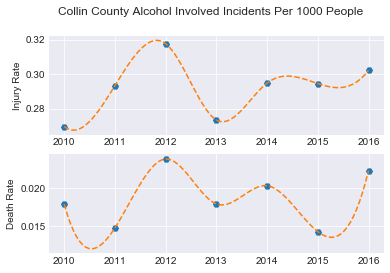

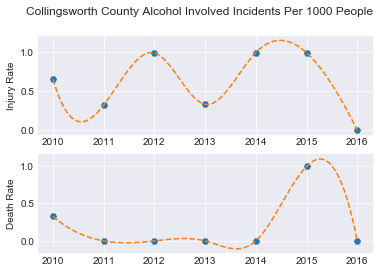

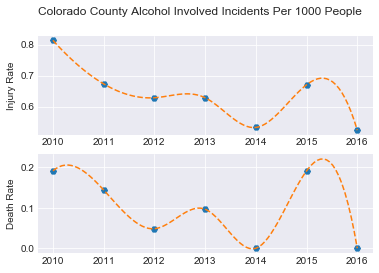

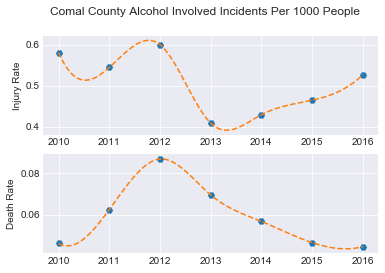

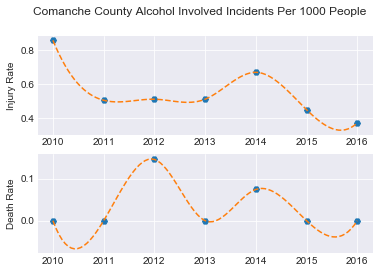

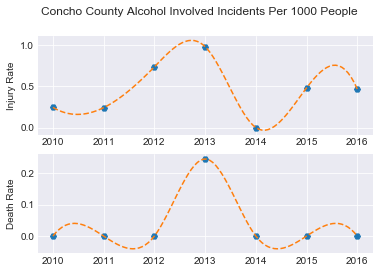

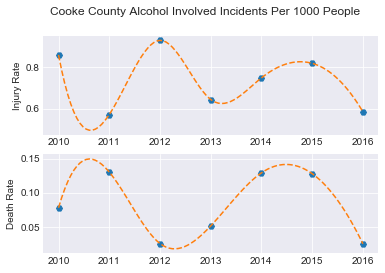

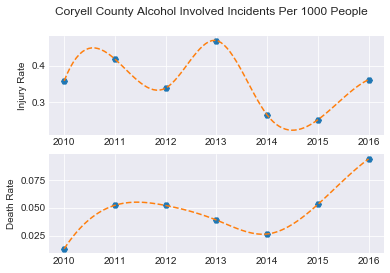

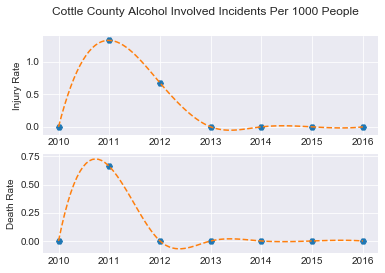

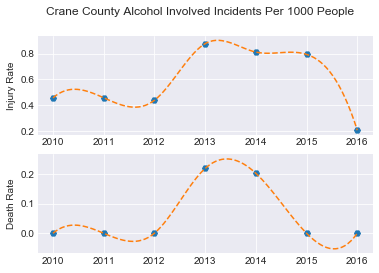

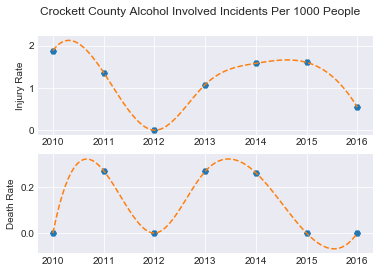

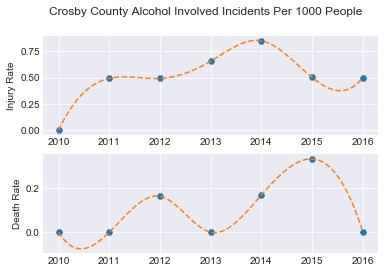

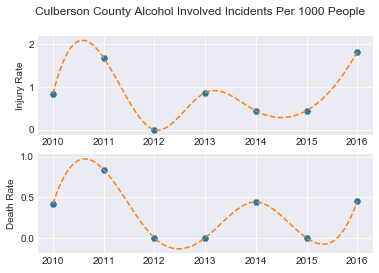

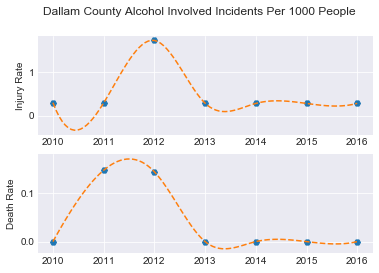

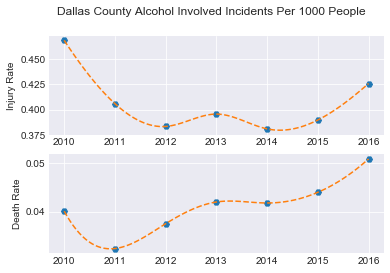

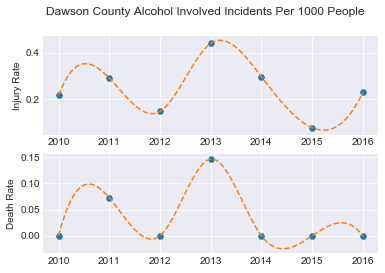

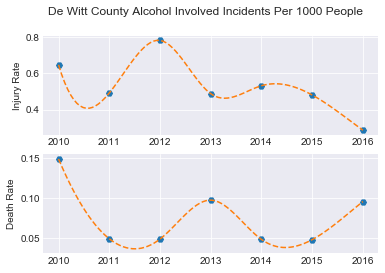

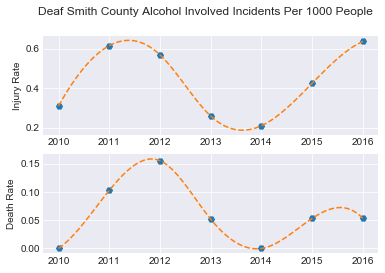

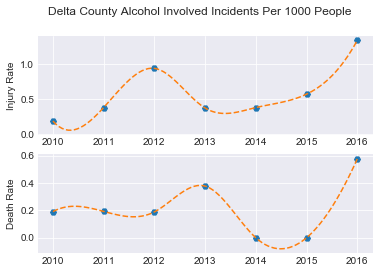

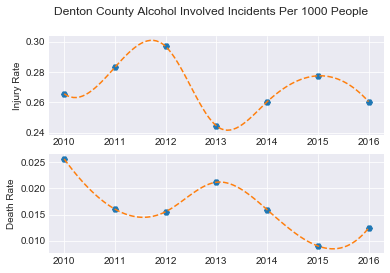

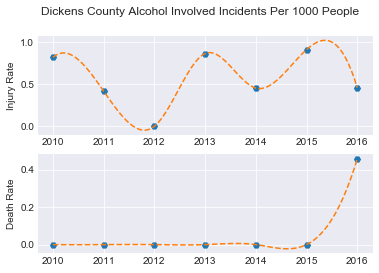

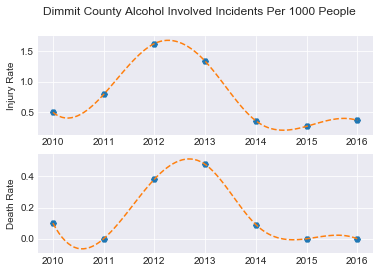

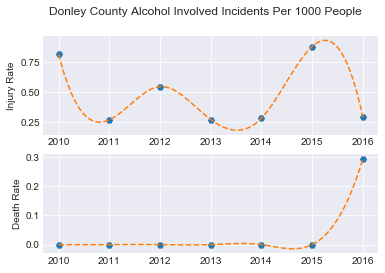

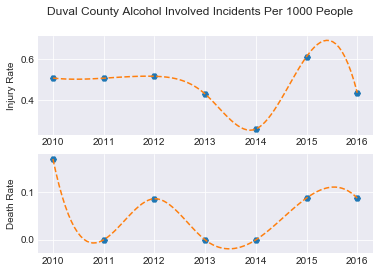

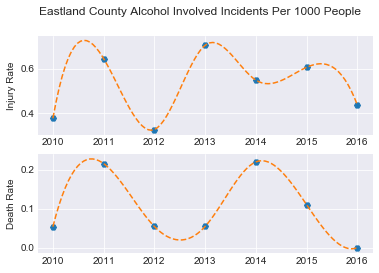

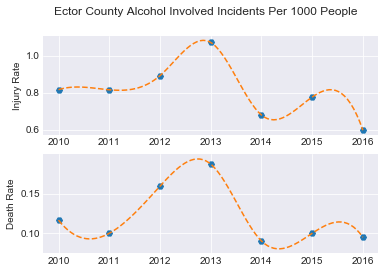

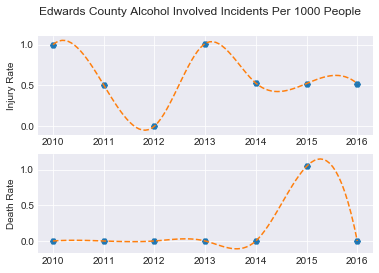

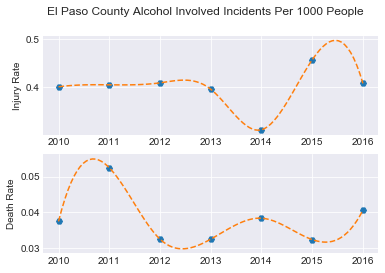

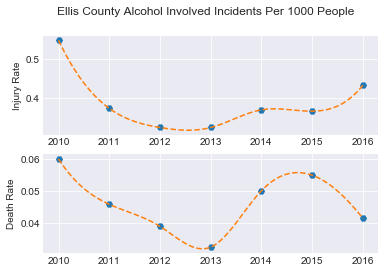

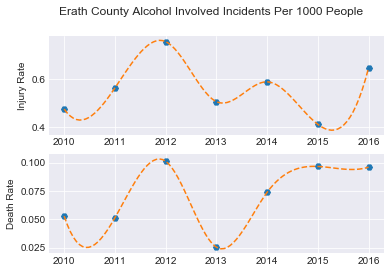

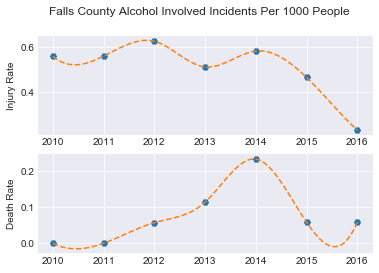

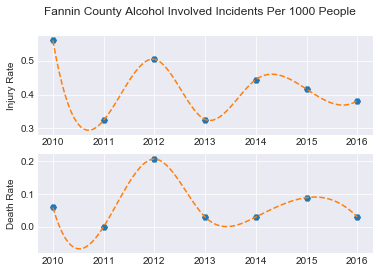

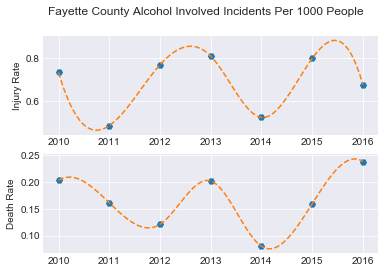

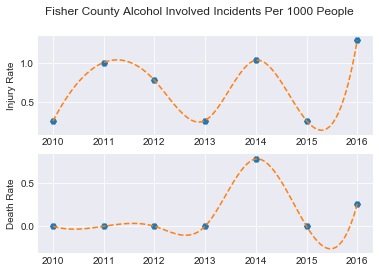

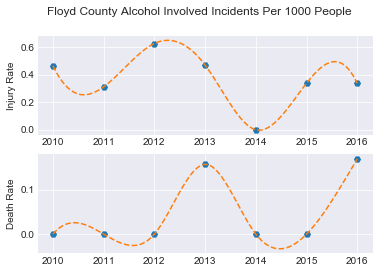

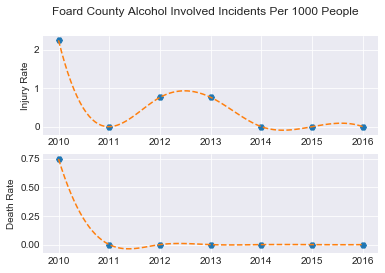

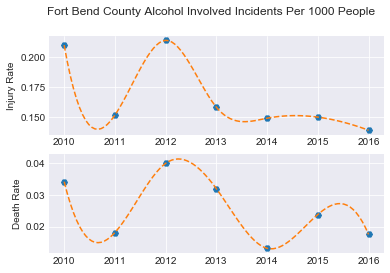

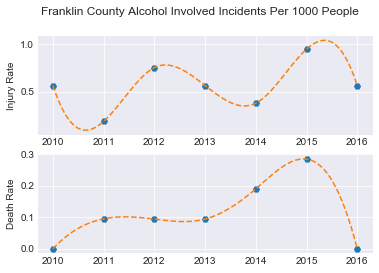

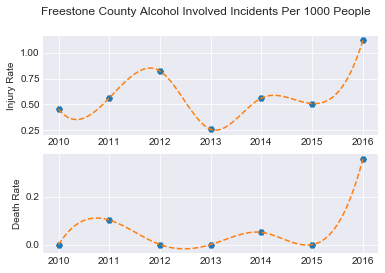

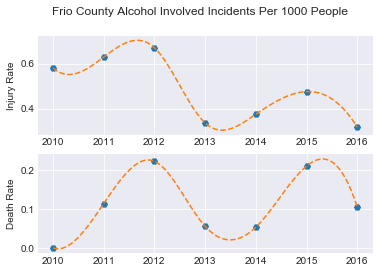

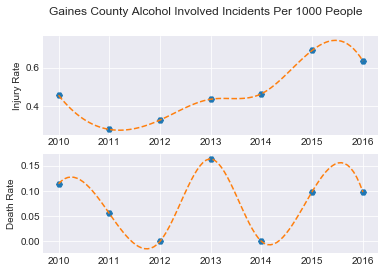

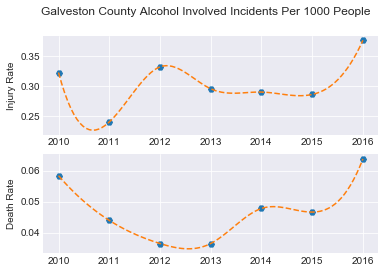

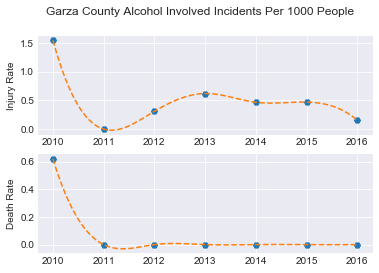

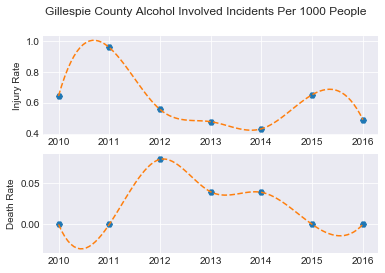

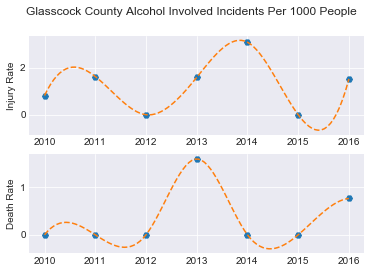

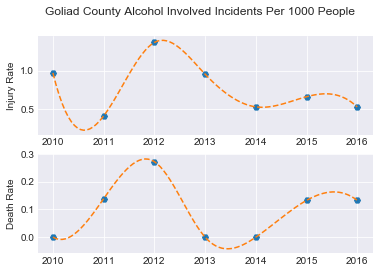

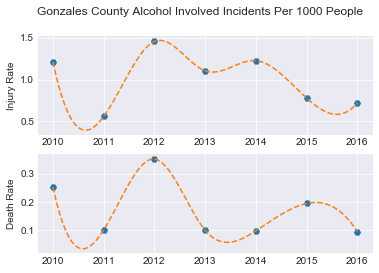

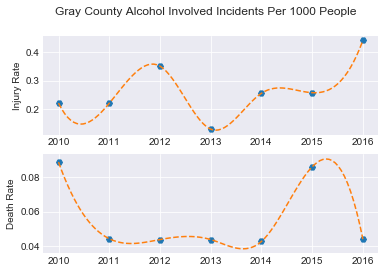

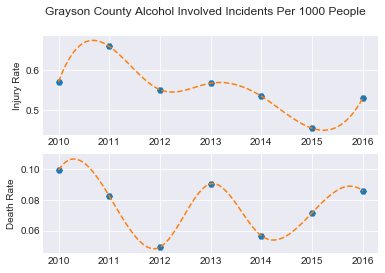

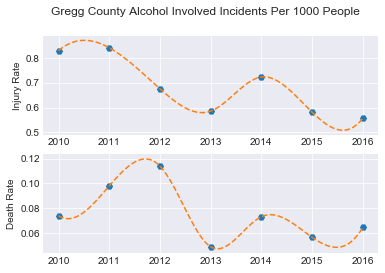

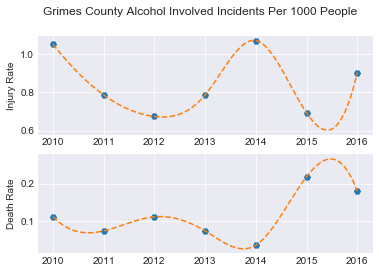

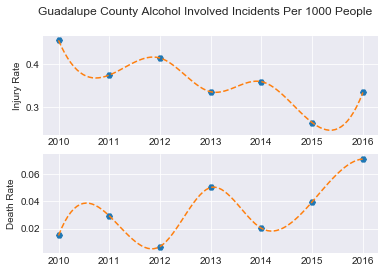

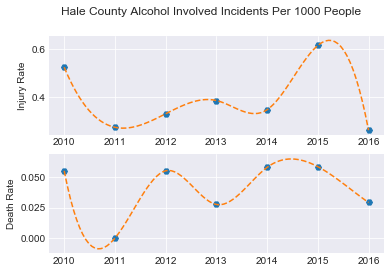

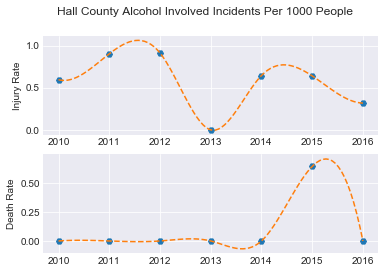

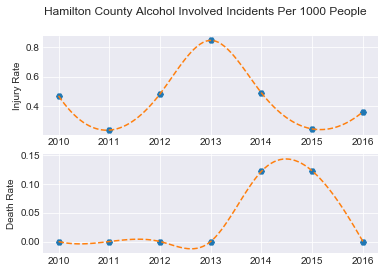

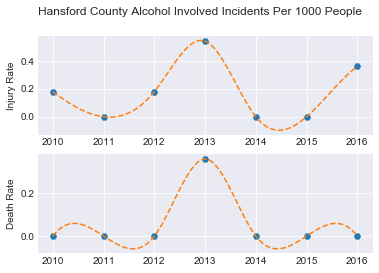

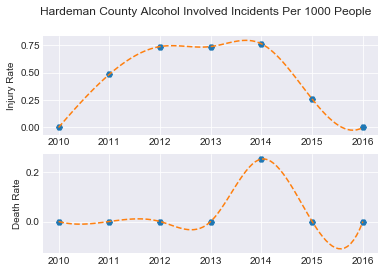

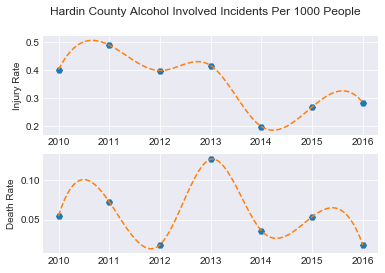

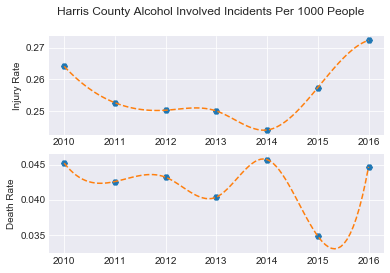

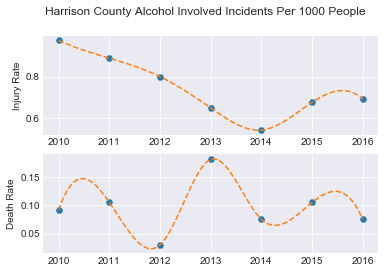

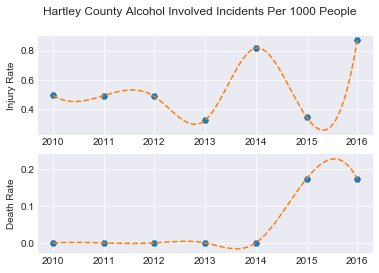

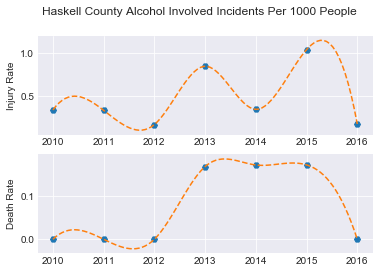

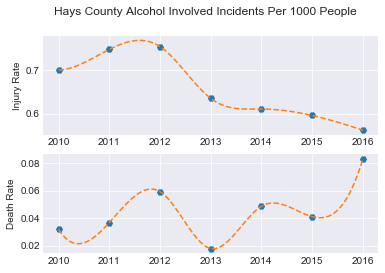

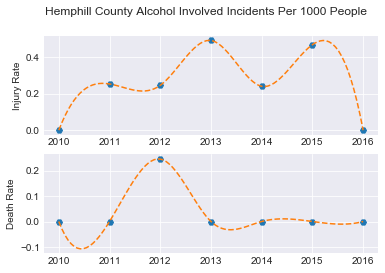

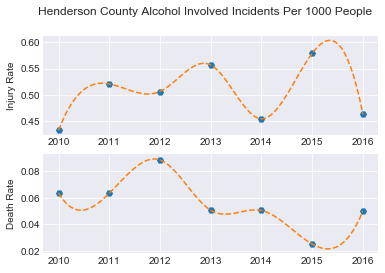

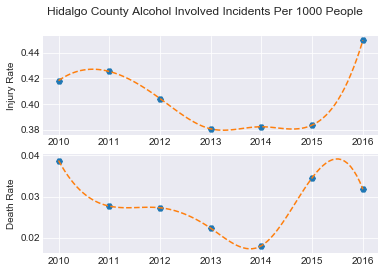

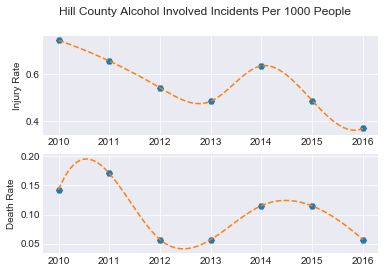

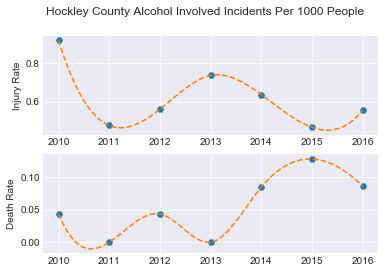

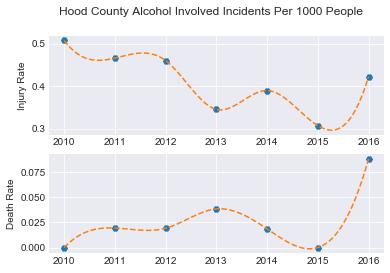

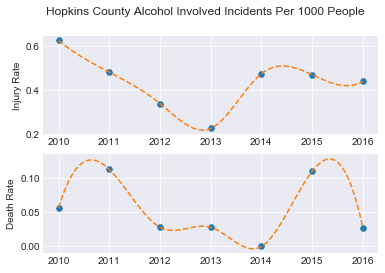

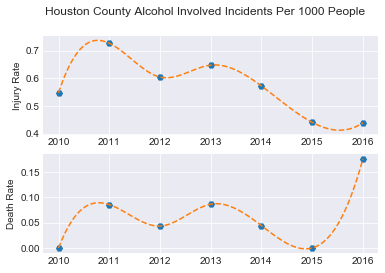

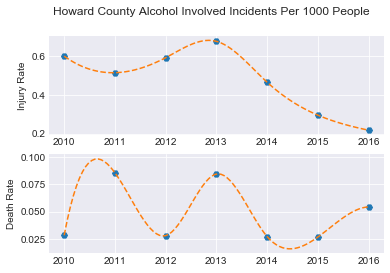

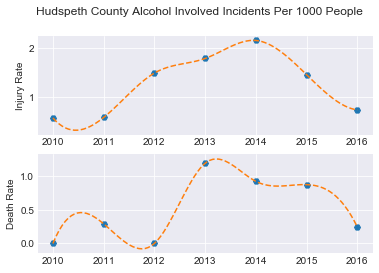

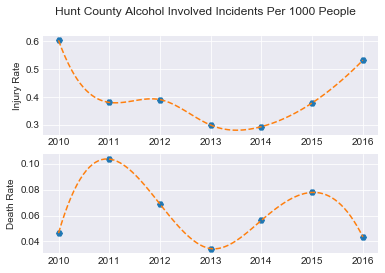

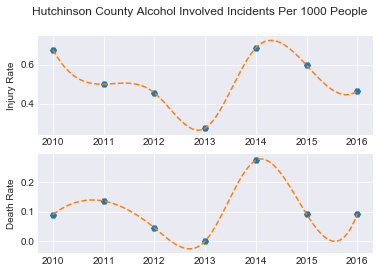

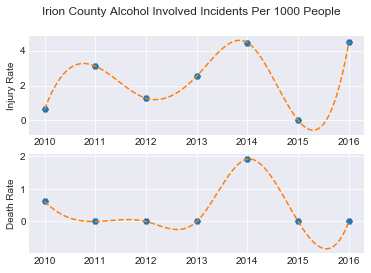

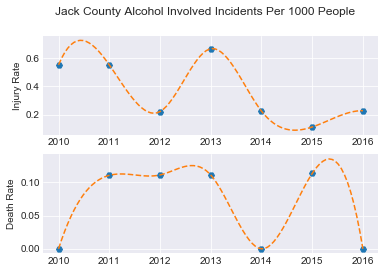

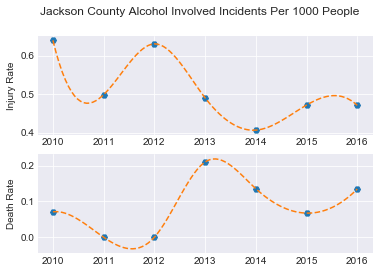

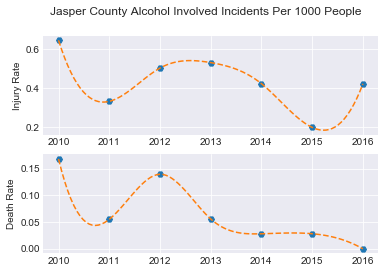

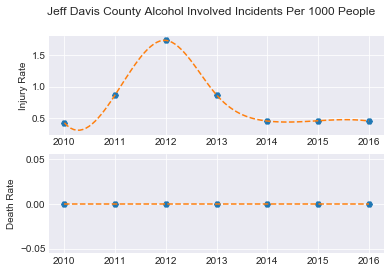

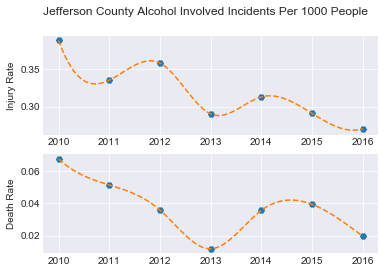

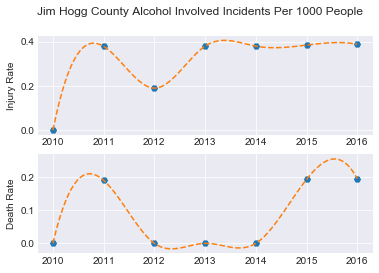

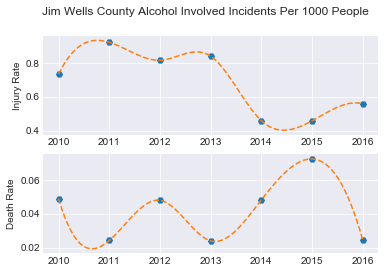

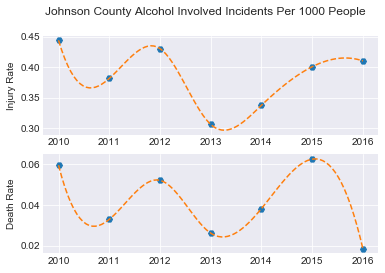

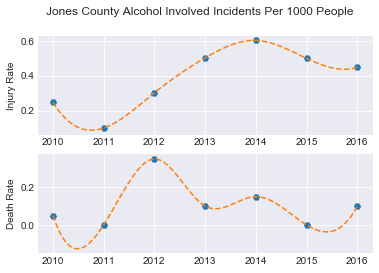

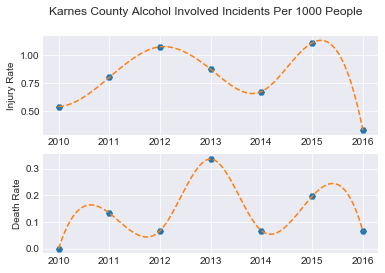

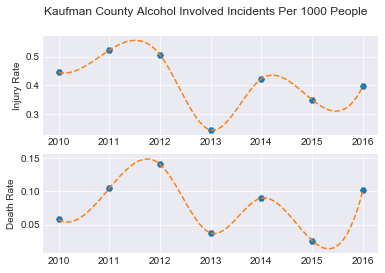

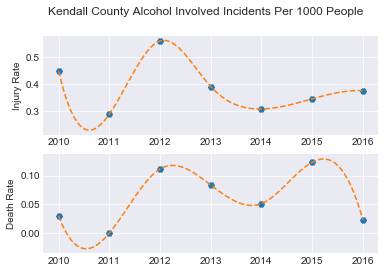

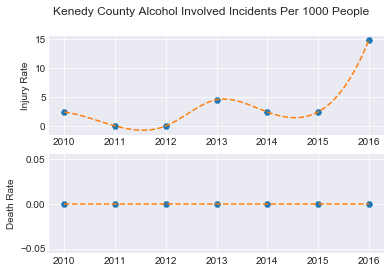

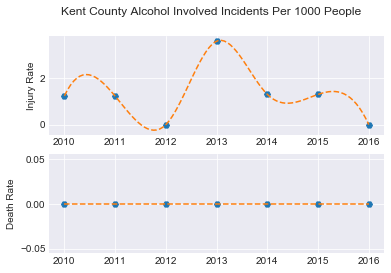

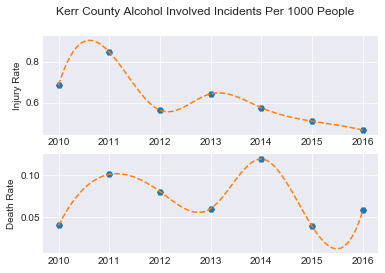

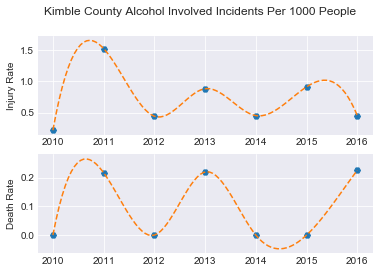

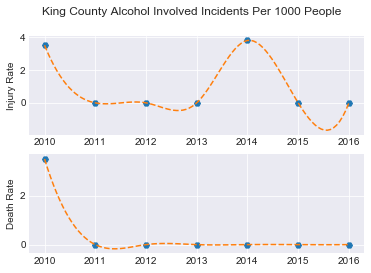

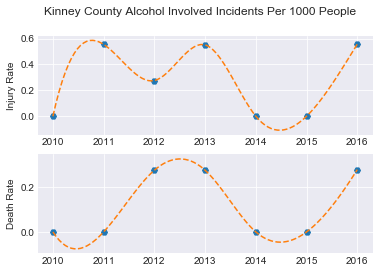

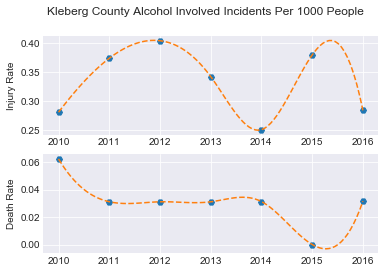

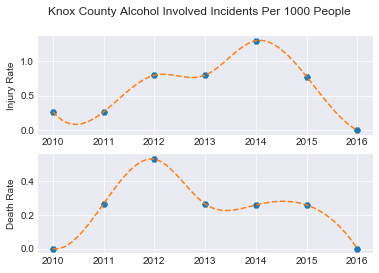

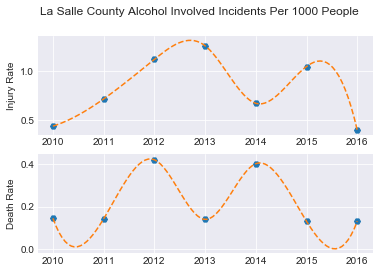

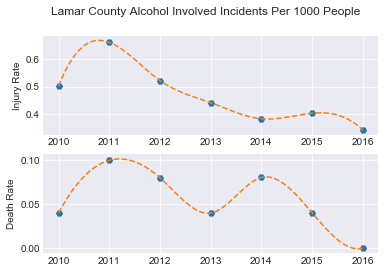

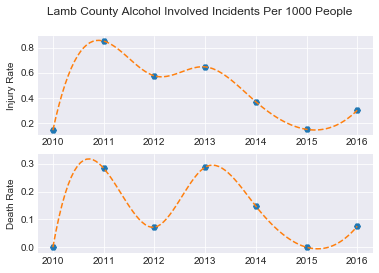

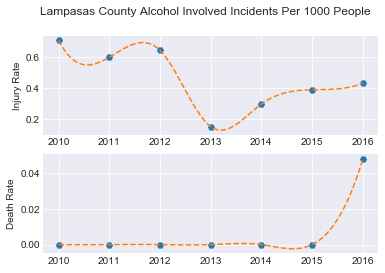

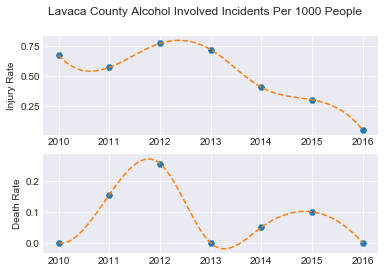

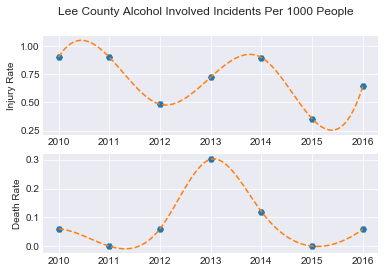

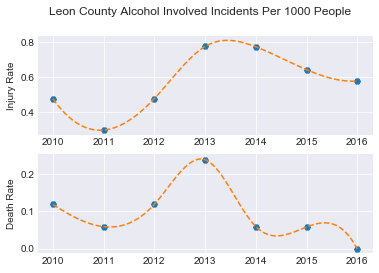

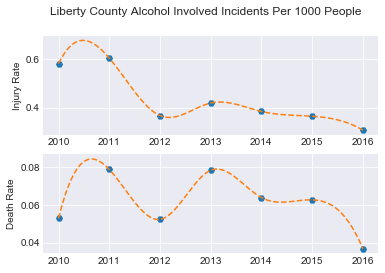

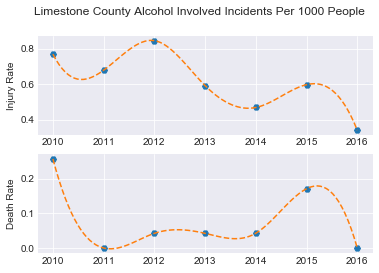

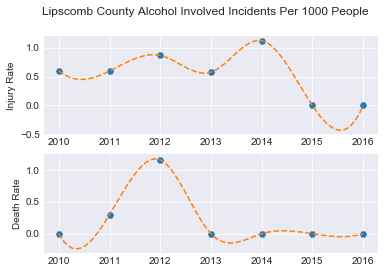

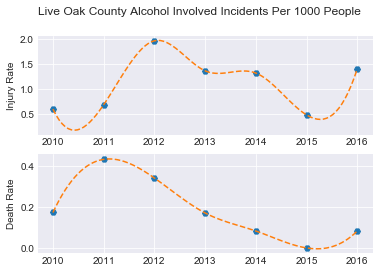

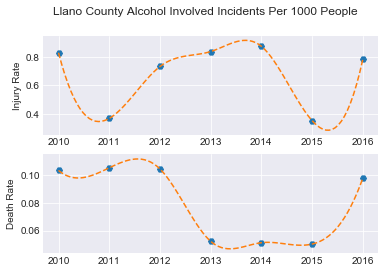

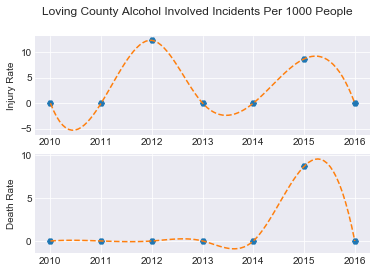

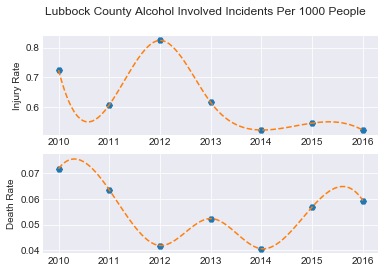

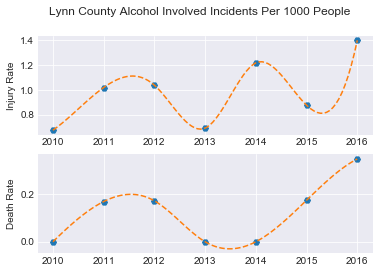

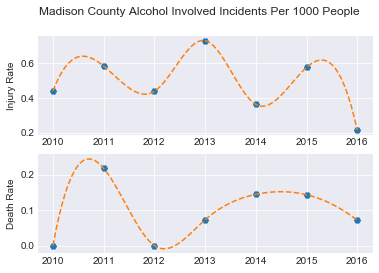

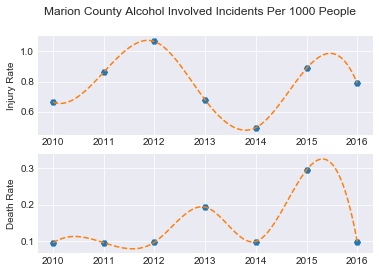

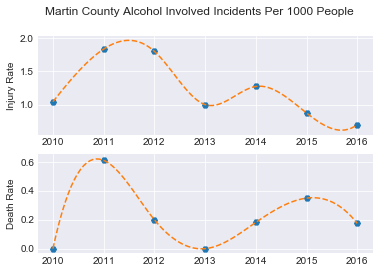

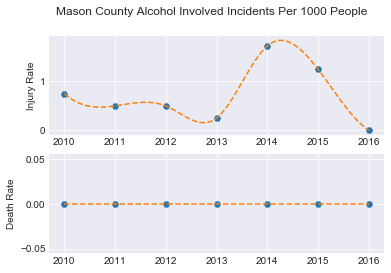

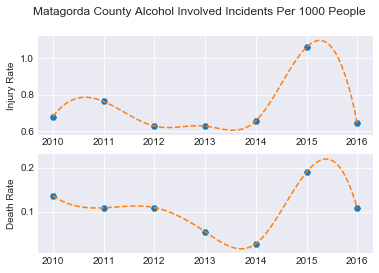

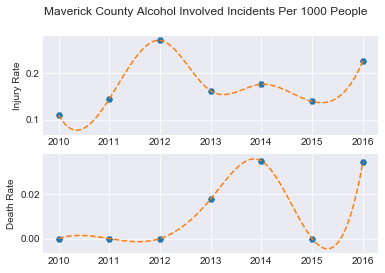

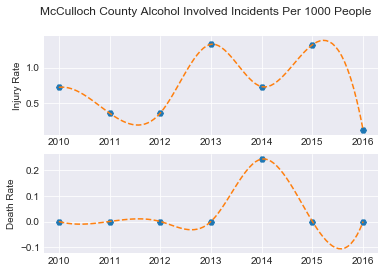

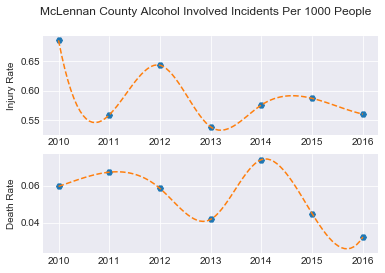

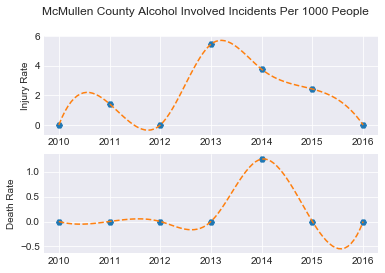

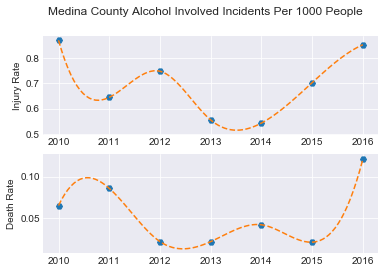

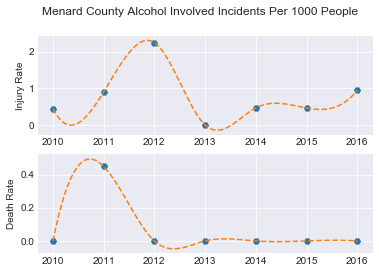

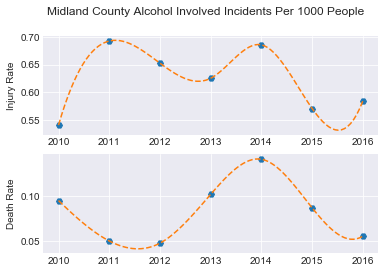

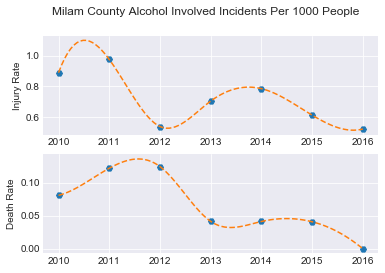

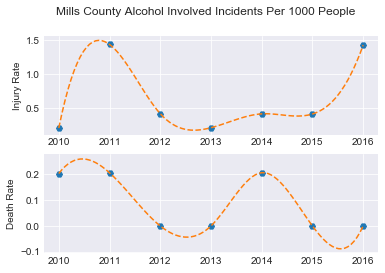

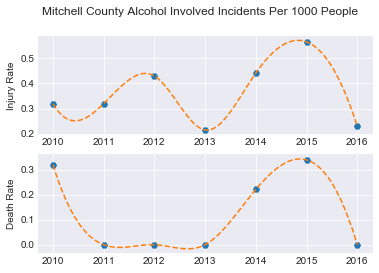

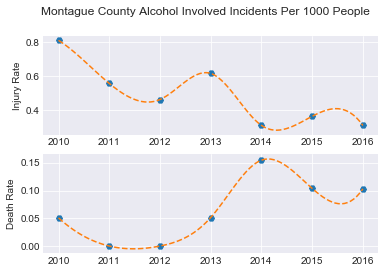

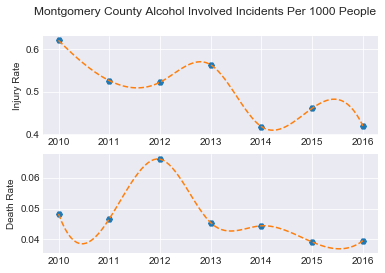

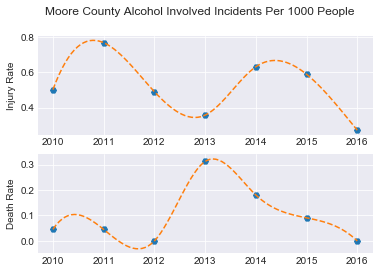

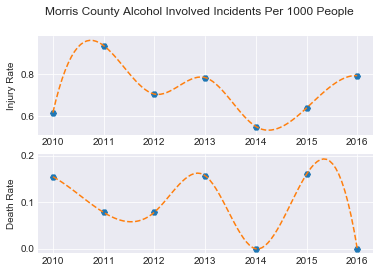

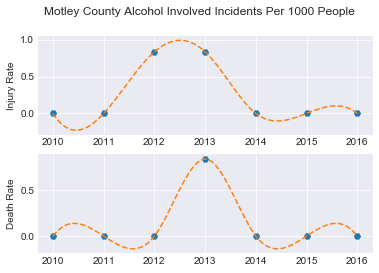

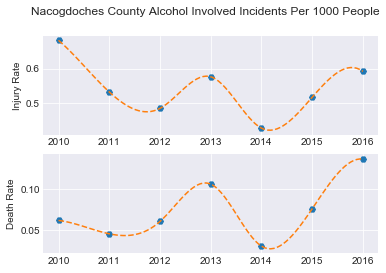

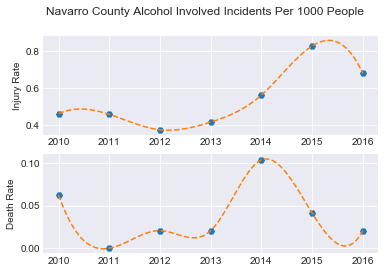

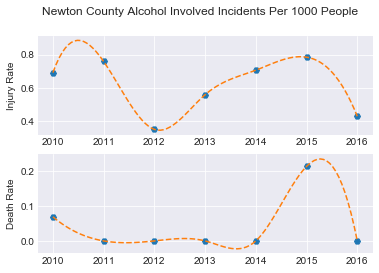

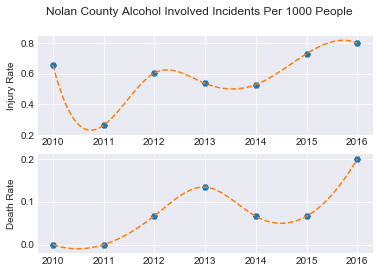

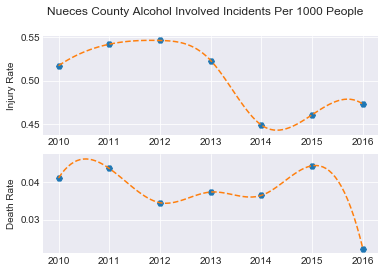

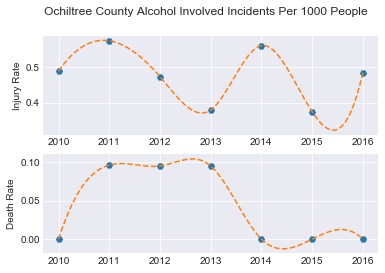

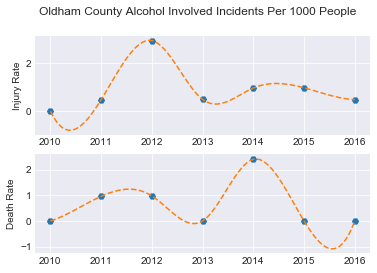

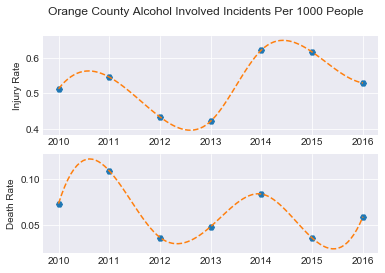

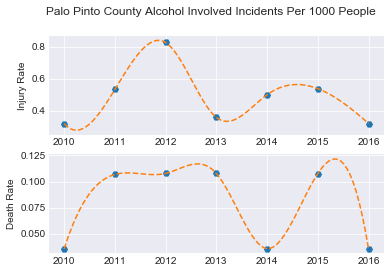

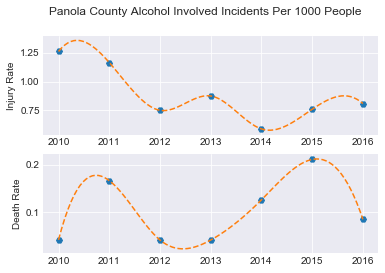

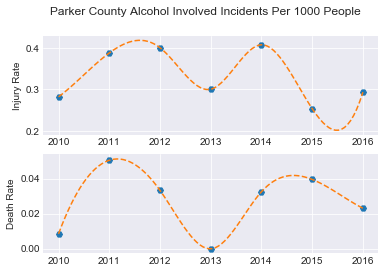

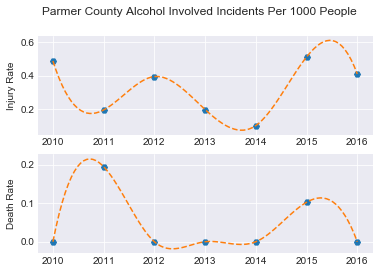

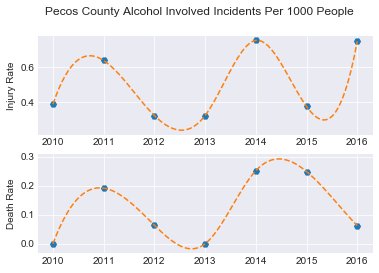

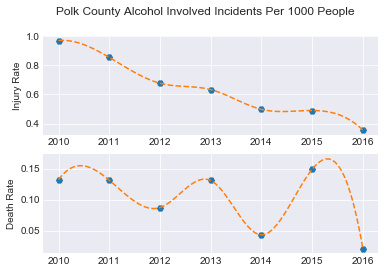

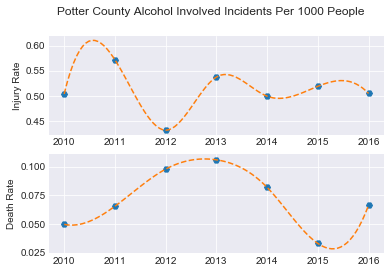

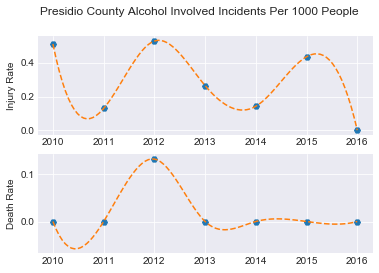

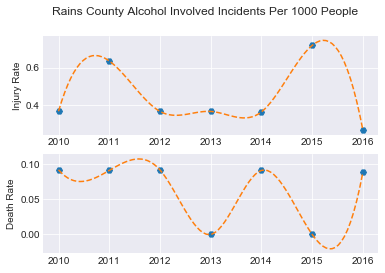

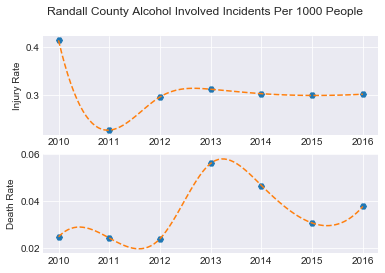

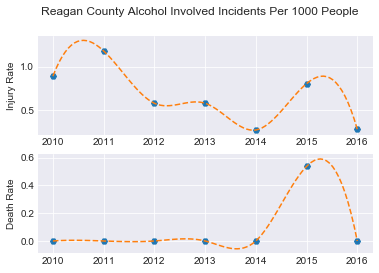

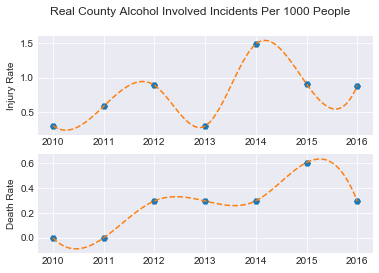

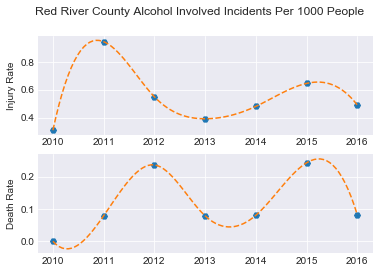

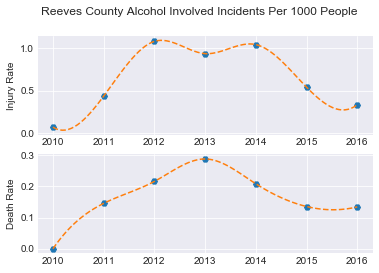

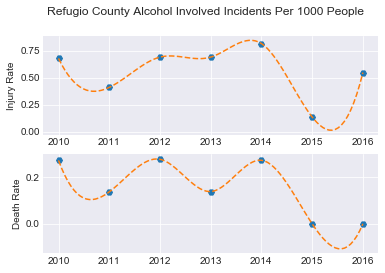

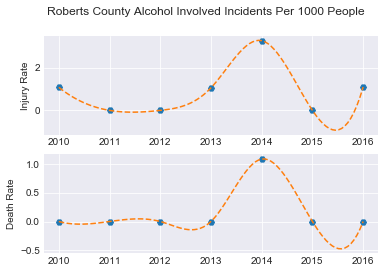

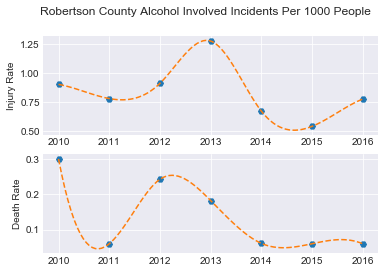

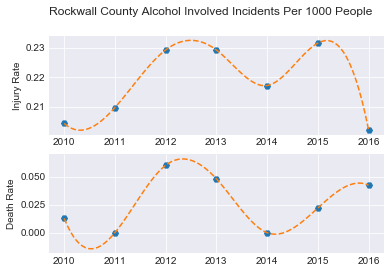

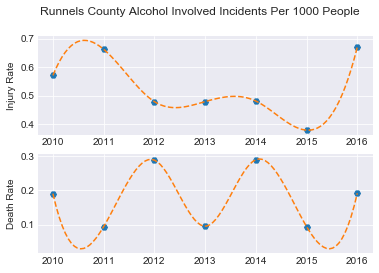

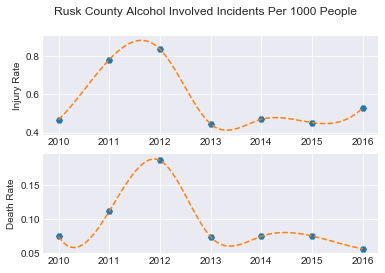

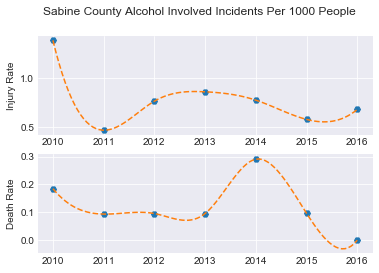

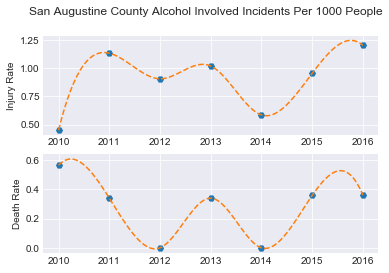

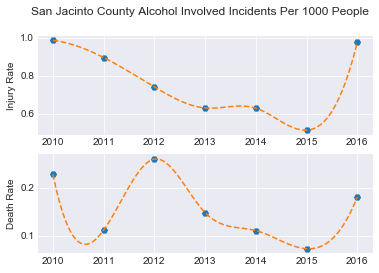

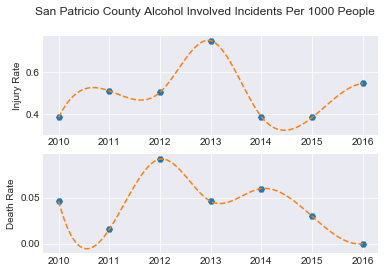

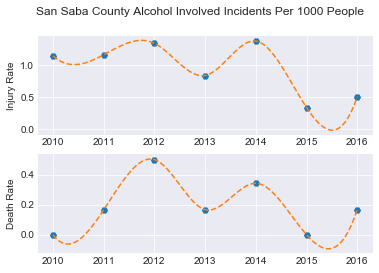

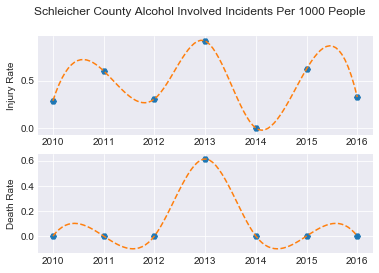

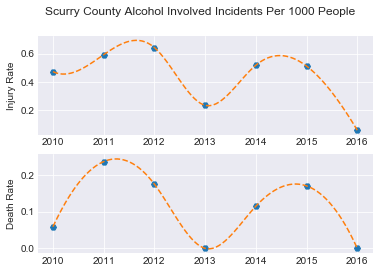

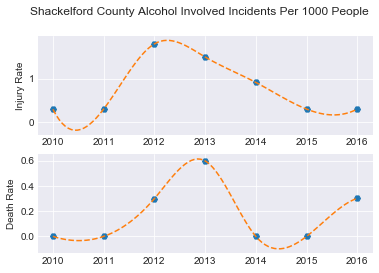

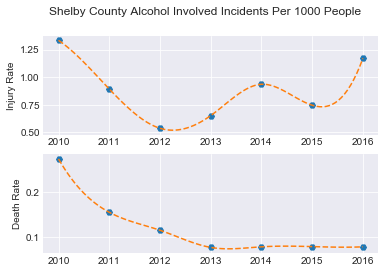

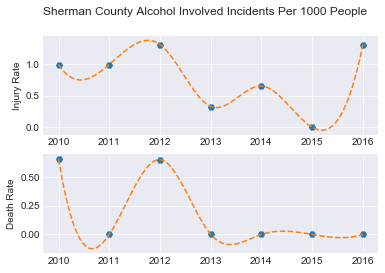

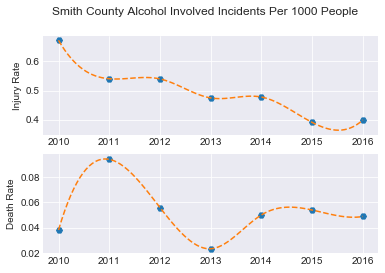

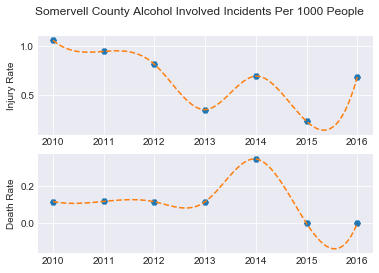

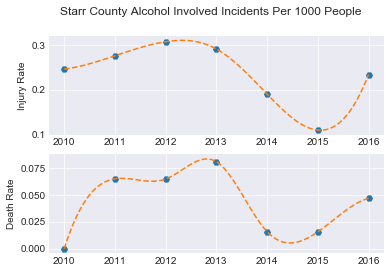

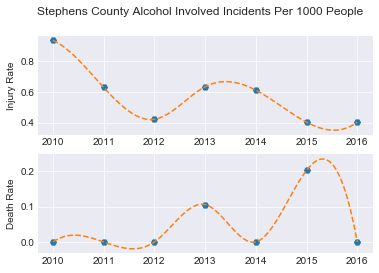

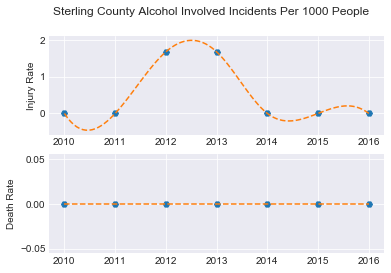

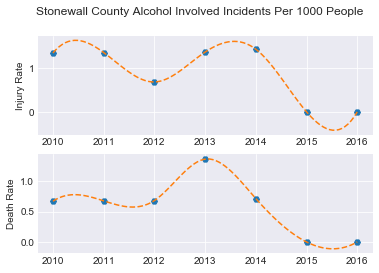

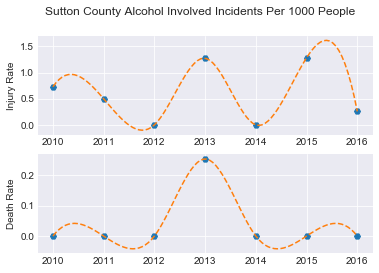

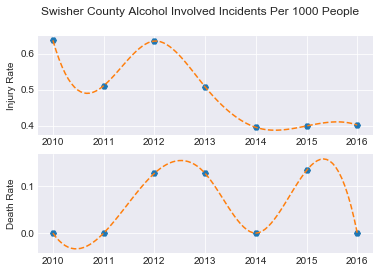

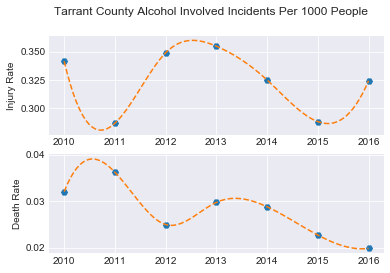

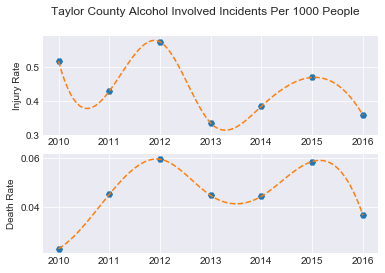

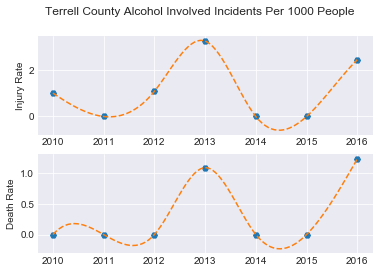

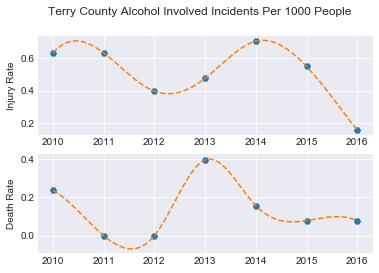

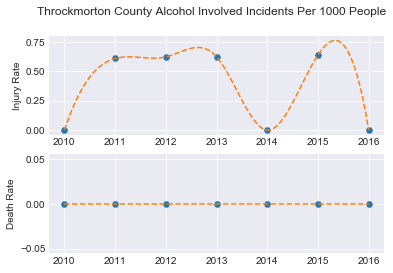

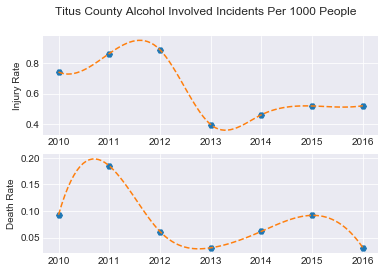

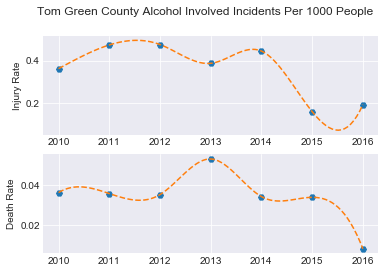

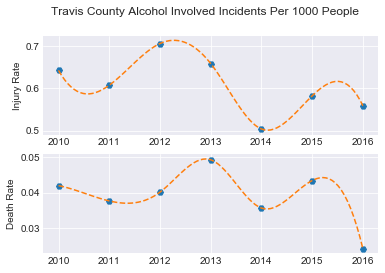

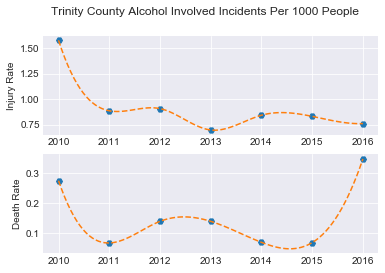

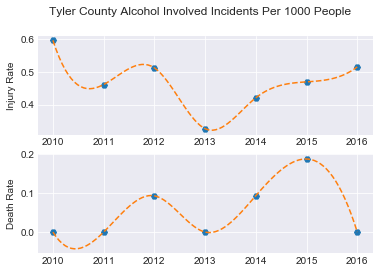

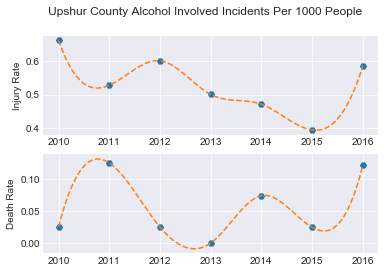

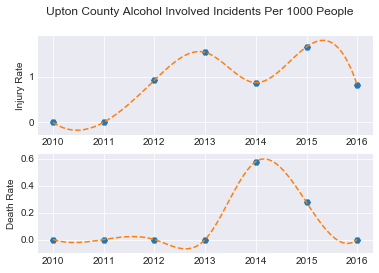

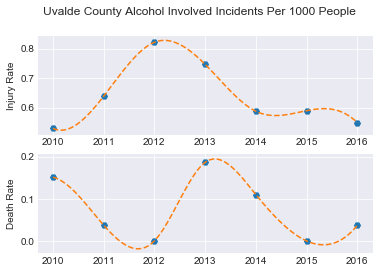

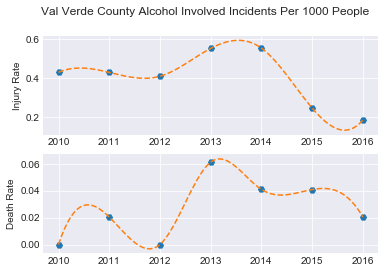

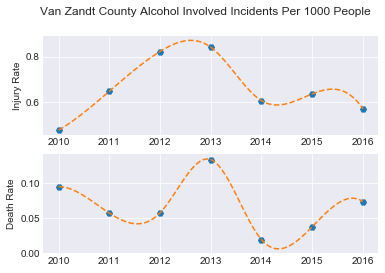

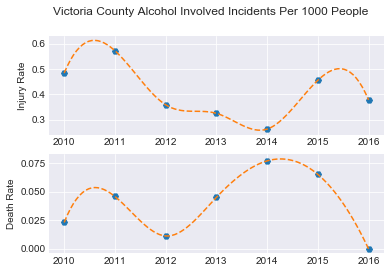

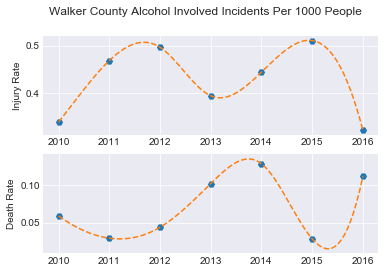

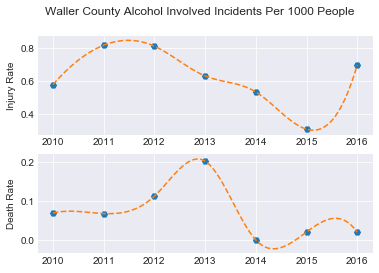

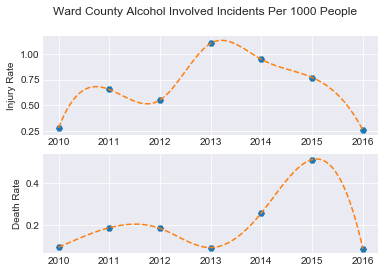

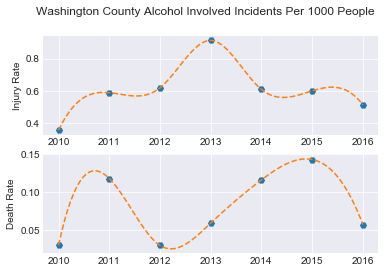

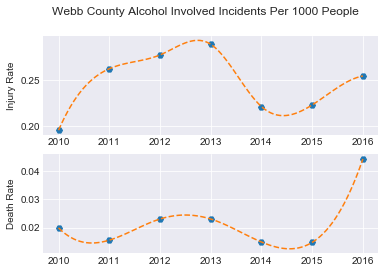

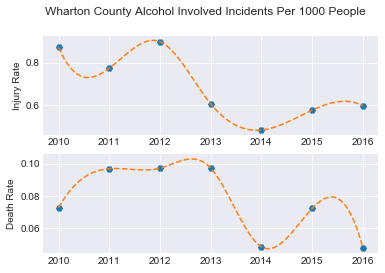

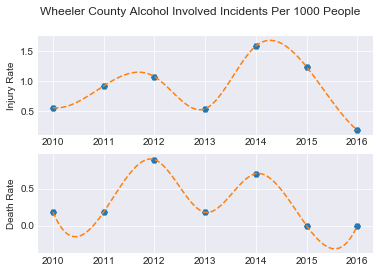

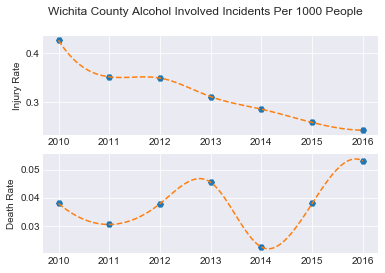

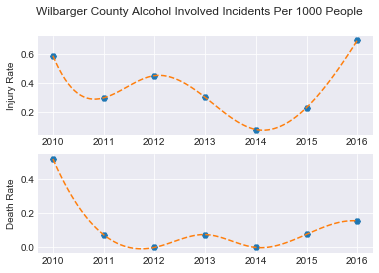

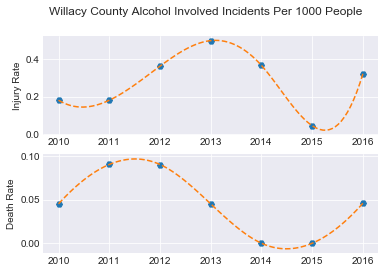

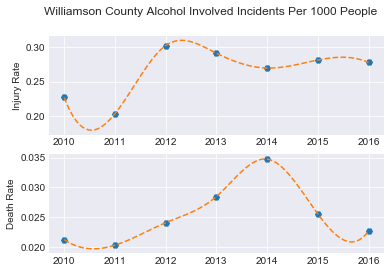

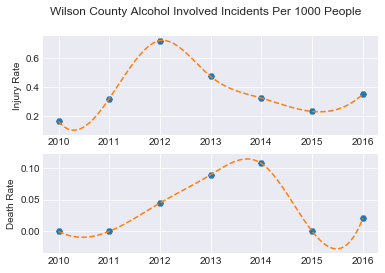

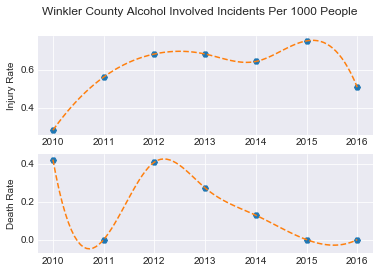

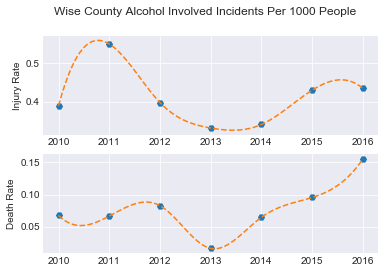

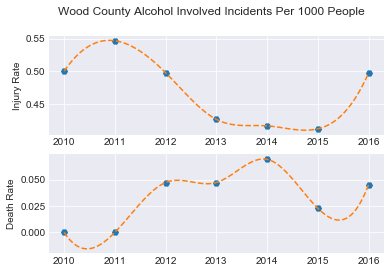

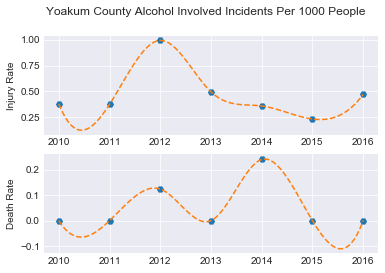

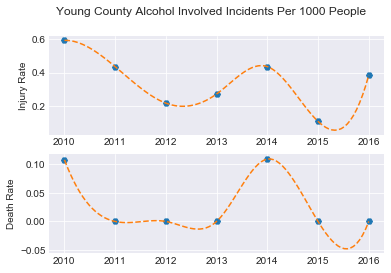

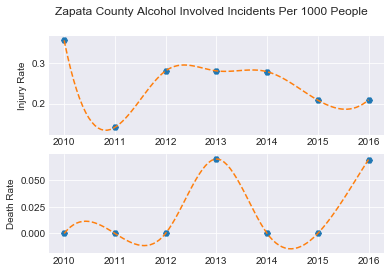

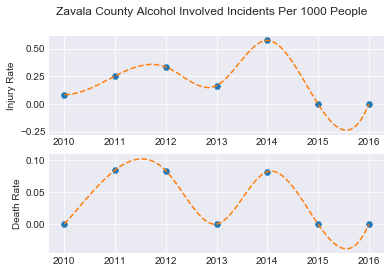

In [5]:
# Create plot for each county and save to image directory.
for county in counties:
    plot_county(county, countydeath_df, countyinjury_df)